In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#한글 포트 설정
import os
if os.name=='posix':
    plt.rc("font", family = 'AppleGothic')
else:
    plt.rc("font", family = "Malgun Gothic")

In [36]:
# 데이터 출처:
# 공공데이터포털 
# 한국소비자원 소비자 피해구제 정보
# https://www.data.go.kr/data/3040720/fileData.do

df = pd.read_csv("C:/temp/소비자.csv", encoding='cp949')
df.head()

,사건번호,접수일(년월일),성별,연령대,지역,판매유형,물품소분류,청구이유
0,2022000005,2022-01-02,남자,40 - 49세,경기도,기타,예식서비스,계약해제.해지/위약금
1,2022000006,2022-01-02,여자,30 - 39세,서울특별시,기타,바닥재·마루공사,품질(물품/용역)
2,2022000007,2022-01-02,여자,20 - 29세,경기도,일반판매,각종자격취득강습,AS불만
3,2022000008,2022-01-02,남자,30 - 39세,경기도,모바일거래,인터넷정보이용서비스,계약불이행(불완전이행)
4,2022000009,2022-01-02,여자,40 - 49세,서울특별시,일반판매,옷장,품질(물품/용역)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10555 entries, 0 to 10554
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   사건번호      10555 non-null  int64 
 1   접수일(년월일)  10555 non-null  object
 2   성별        10555 non-null  object
 3   연령대       10555 non-null  object
 4   지역        10555 non-null  object
 5   판매유형      10555 non-null  object
 6   물품소분류     10529 non-null  object
 7   청구이유      10125 non-null  object
dtypes: int64(1), object(7)
memory usage: 659.8+ KB


In [38]:
# 연령대의 분포도를 확인하기 위해 출력
df.groupby('연령대').count()['성별']

연령대
(미입력)         29
10 - 19세      46
10세 미만         2
20 - 29세    1624
30 - 39세    3230
40 - 49세    2620
50 - 59세    1716
60 - 64세     584
65 - 69세     289
70 - 79세     216
80세이상         59
불명           140
Name: 성별, dtype: int64

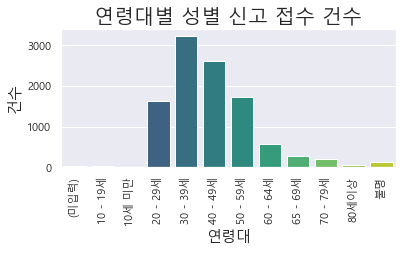

In [39]:
# 연령대별 성별 개수 데이터프레임 생성
age = pd.DataFrame(df.groupby('연령대')['성별'].count()) 
# 바 플롯 그리기
sns.barplot(x=age.index, y=age['성별'], palette='viridis')

# 제목 및 라벨 추가
plt.title('연령대별 성별 신고 접수 건수', fontsize=20)
plt.xlabel('연령대', fontsize=15)
plt.ylabel('건수', fontsize=15)

plt.xticks(ticks=range(len(age.index)), labels=age.index, rotation=90, ha='center')
plt.subplots_adjust(bottom=0.4)
# 그래프 출력
plt.show()

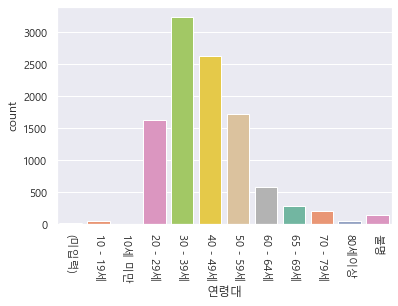

In [45]:
## 연령대 분포표
ax = sns.countplot(x='연령대', data= df, palette='Set2', order=age.index)
plt.xticks(rotation=270)
plt.show()

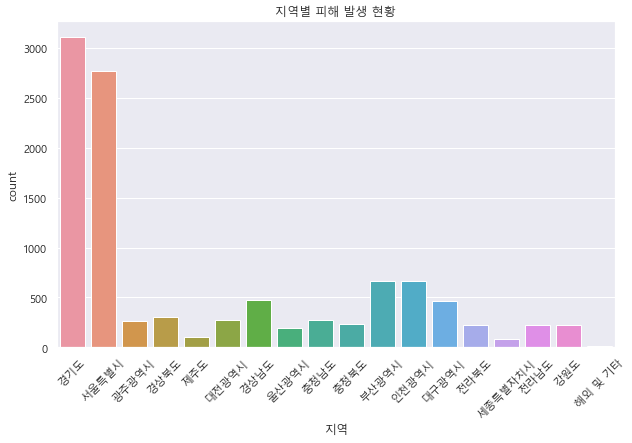

In [47]:
# 2. 지역별 피해 발생 현황 (지역 컬럼이 있다면)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='지역')  # '지역'을 데이터 컬럼에 맞게 수정
plt.title('지역별 피해 발생 현황')
plt.xticks(rotation=45)
plt.show()

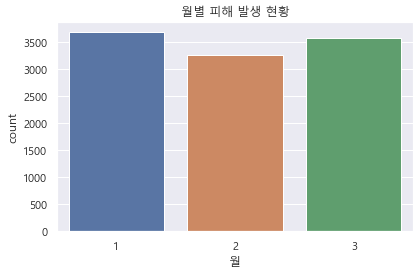

In [56]:
# 날짜 형식 변환
df['접수일'] = pd.to_datetime(df['접수일(년월일)'], errors='coerce')  
df['년도'] = df['접수일(년월일)'].dt.year
df['월'] = df['접수일(년월일)'].dt.month

#월별 피해 발생 현황
sns.countplot(data=df, x='월')
plt.title('월별 피해 발생 현황')

# 그래프 출력
plt.tight_layout()  
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '기타'),
  Text(1, 0, '일반판매'),
  Text(2, 0, '모바일거래'),
  Text(3, 0, '전화권유판매'),
  Text(4, 0, '국내온라인거래'),
  Text(5, 0, '방문판매'),
  Text(6, 0, 'TV홈쇼핑'),
  Text(7, 0, '국제온라인거래'),
  Text(8, 0, '소셜커머스(쇼핑)'),
  Text(9, 0, '노상판매'),
  Text(10, 0, '기타통신판매'),
  Text(11, 0, '다단계판매'),
  Text(12, 0, '후원방문판매')])

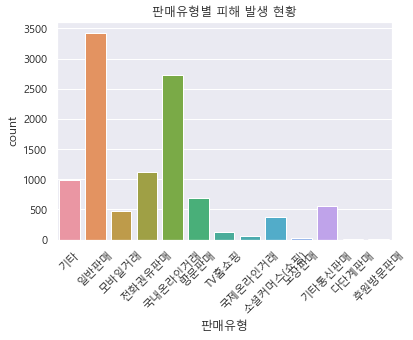

In [57]:
#판매유형별 피해 발생 현황 그래프
sns.countplot(data=df, x='판매유형')  
plt.title('판매유형별 피해 발생 현황')
plt.xticks(rotation=45)

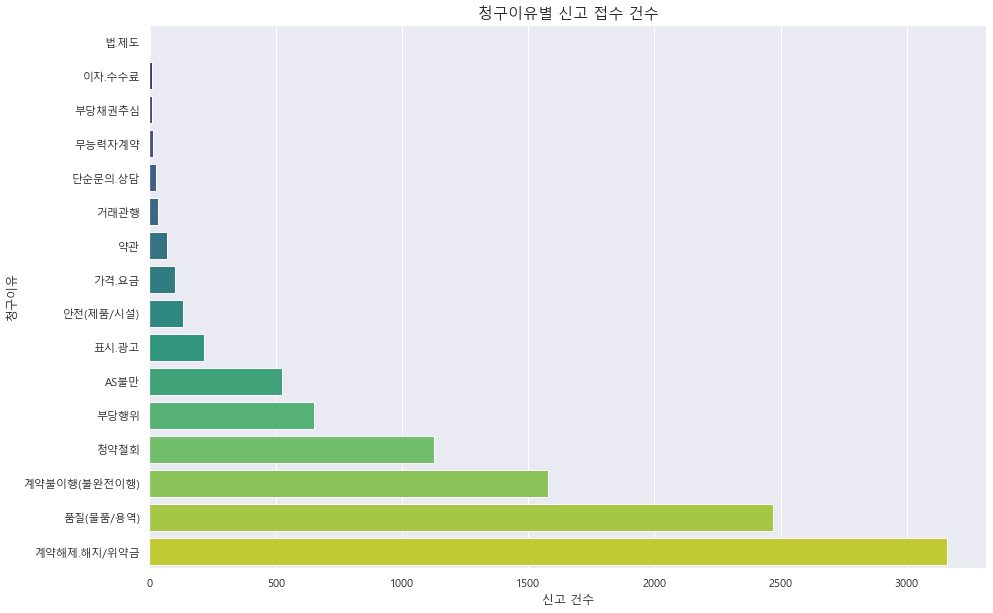

In [41]:
# 청구이유의 분포도를 확인하기 위해 출력

# 청구이유별 신고 접수 건수 계산
reason_counts = df.groupby('청구이유')['성별'].count().sort_values()

# 그래프 크기 설정
plt.figure(figsize=(15, 10)) 

# 가로 막대 그래프 그리기
sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='viridis')

# 제목 및 라벨 추가
plt.title('청구이유별 신고 접수 건수', fontsize=15)
plt.xlabel('신고 건수', fontsize=12)
plt.ylabel('청구이유', fontsize=12)

# 그래프 출력
plt.show()

In [42]:
# 데이터프레임
cas = pd.DataFrame(df.groupby('청구이유').count()['성별'].sort_values(ascending=False))
cas

,성별
청구이유,
계약해제.해지/위약금,3158
품질(물품/용역),2472
계약불이행(불완전이행),1577
청약철회,1126
부당행위,651
AS불만,524
표시.광고,216
안전(제품/시설),134
가격.요금,100


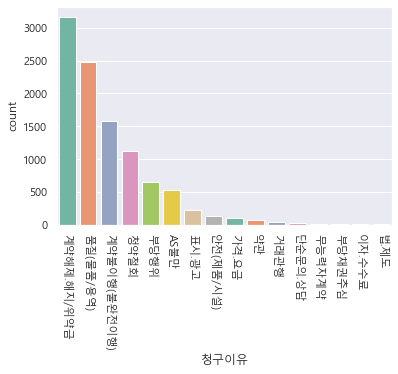

In [43]:
##청구이유 분포표를 내림차순으로 출력
bx = sns.countplot(x='청구이유', data = df, palette = 'Set2', order=cas.index)
plt.xticks(rotation=270)
plt.show()

In [44]:
# '접수일(년월일)'의 데이터형 변경
df['접수일(년월일)'] = pd.to_datetime(df['접수일(년월일)'], errors='coerce')

# 접수일 월을 'month'에 저장
df['month'] = df['접수일(년월일)'].apply(lambda x: str(x).split('-')[1] if pd.notna(x) else np.nan)

# 성별별 신고 접수 개수 확인
df.groupby('성별')['청구이유'].count().sort_values()

성별
남자    4915
여자    5210
Name: 청구이유, dtype: int64